In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
from os.path import basename, join, exists

In [ ]:
folder=r"/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/"
total=0
print('---Training set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir(folder + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of images ",total)

---Training set details----
1676 with_DR images
1608 without_DR images
Total no. of images  3284


In [ ]:
folder=r"/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Test/"
total=0
print('---Test set details----')
for sub_folder in os.listdir(folder):
  no_of_images=len(os.listdir(folder + sub_folder))
  total+=no_of_images
  print(str(no_of_images) + " " + sub_folder + " images")

print("Total no. of images",total)

---Test set details----
181 with_DR images
197 without_DR images
Total no. of images 378


In [ ]:
import numpy as np
np.random.seed(777)
import time
import keras as keras
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import decode_predictions
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input as pi_vgg16
from keras.applications.inception_v3 import preprocess_input as pi_incep
from tensorflow.keras.applications.resnet50 import preprocess_input as pi_resnet
from keras.applications.vgg19 import preprocess_input as pi_vgg19
from keras.applications.xception import preprocess_input as pi_xcep 
from keras.models import load_model
from numpy import array
from numpy import argmax
from sklearn.metrics import accuracy_score
from  numpy import mean 
from numpy import std
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras.layers import GlobalAveragePooling2D, Concatenate
from keras.layers import BatchNormalization,Dropout
from keras.layers import Lambda
from keras.regularizers import l2
import math
from keras import backend as K
from keras.metrics import categorical_accuracy
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [ ]:
img_height =224
img_width = 224
batch_size =32
input_shape = (img_width, img_height, 3)

In [ ]:
random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    validation_split= 0.2,
    zoom_range=0.2)
    #shear_range=0.2)

train_generator_Excep = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'training',
    class_mode='binary')

val_generator_Excep = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Train/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle=False,
    subset = 'validation',
    class_mode='binary')
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator_Excep=test_datagen.flow_from_directory("/content/drive/MyDrive/My_projects _and _datasets/Final_work/APTOS/Test/",
                                                      target_size=(img_height, img_width),
                                                          batch_size=batch_size, 
                                                          seed=random_seed,
                                                          shuffle=False,
                                                          class_mode='binary') # set as training data

Found 2628 images belonging to 2 classes.
Found 656 images belonging to 2 classes.
Found 378 images belonging to 2 classes.


In [ ]:
nb_train_samples = len(train_generator_Excep.filenames)
nb_validation_samples = len(val_generator_Excep.filenames)
predict_size_train = int(math.ceil(nb_train_samples / batch_size))
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

nb_test_samples = len(test_generator_Excep.filenames)
predict_size_test = int(math.ceil(nb_test_samples / batch_size))
print(nb_train_samples)
print(nb_validation_samples)
print(nb_test_samples)
print(predict_size_train)
print(predict_size_validation)
print(predict_size_test)

2628
656
378
83
21
12


In [ ]:
model_name="ResNet152V2"
model = ResNet152V2(include_top=False, weights="imagenet",pooling='avg',input_tensor=Input(shape=input_shape))
model.summary()

234561536/234545216 [==============================] - 10s 0us/step
Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                    

In [ ]:
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                        

In [ ]:
bottleneck_features_train = model.predict_generator(train_generator_Excep, predict_size_train)
np.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/'+'bottleneck_features_train_'+model_name+'.npy', bottleneck_features_train)

In [ ]:
bottleneck_features_validation = model.predict_generator(val_generator_Excep, predict_size_validation)
np.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/'+'bottleneck_features_validation_'+model_name+'.npy', bottleneck_features_validation)

In [ ]:
bottleneck_features_test = model.predict_generator(test_generator_Excep, predict_size_test)
np.save("/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/"+'bottleneck_features_test_'+model_name+'.npy', bottleneck_features_test)

In [ ]:
train_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_train_ResNet152V2.npy')
validation_data=np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_validation_ResNet152V2.npy')
test_data = np.load('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/bottleneck_features_test_ResNet152V2.npy')

In [ ]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(2628, 2048)
(656, 2048)
(378, 2048)


In [ ]:
train_labels=train_generator_Excep.classes
train_labels=train_labels = to_categorical(train_labels, num_classes=2)
validation_labels=val_generator_Excep.classes
validation_labels = to_categorical(validation_labels, num_classes=2)
test_labels=test_generator_Excep.classes
test_labels=to_categorical(test_labels,num_classes=2)

In [ ]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(2628, 2)
(656, 2)
(378, 2)


In [ ]:
model = Sequential()
model.add(Dense(112,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
adam_opt2=Adam(lr = 0.001, beta_1=0.6, beta_2=0.8, amsgrad=True)

model.compile(optimizer=adam_opt2, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=1000,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels),
                    verbose= 1)

Epoch 1/1000
83/83 [==============================] - 1s 6ms/step - loss: 0.2993 - accuracy: 0.8855 - val_loss: 0.1583 - val_accuracy: 0.9512
Epoch 2/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.2087 - accuracy: 0.9258 - val_loss: 0.1339 - val_accuracy: 0.9634
Epoch 3/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.9403 - val_loss: 0.1259 - val_accuracy: 0.9680
Epoch 4/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.1645 - accuracy: 0.9452 - val_loss: 0.1218 - val_accuracy: 0.9726
Epoch 5/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.9505 - val_loss: 0.1179 - val_accuracy: 0.9695
Epoch 6/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.1408 - accuracy: 0.9521 - val_loss: 0.1089 - val_accuracy: 0.9680
Epoch 7/1000
83/83 [==============================] - 0s 5ms/step - loss: 0.1363 - accuracy: 0.9581 - val_loss: 0.1284 - val_accuracy: 0.9634
Epoch 

In [ ]:
preds = model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9710365853658537


In [ ]:
preds = model.predict(test_data)

predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
#cm = confusion_matrix(y_pred=predictions, y_true=y_true)

print('Accuracy {}'.format(accuracy_score(y_true=y_true, y_pred=predictions)))

Accuracy 0.9867724867724867


In [ ]:
model.save('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/ResNet152V2_upto15frozen.h5')
model.save_weights('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/ResNet152V2_upto15frozen_weights.h5')

In [ ]:
loaded_model=load_model('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/ResNet152V2_upto15frozen.h5',compile=False)
loaded_model.load_weights('/content/drive/MyDrive/My_projects _and _datasets/IDRID_detection/ResNet152V2_upto15frozen_weights.h5')

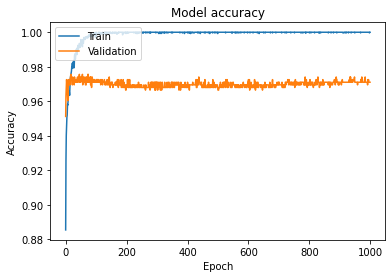

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

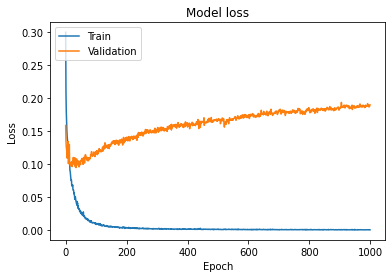

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import pandas as pd

In [ ]:
preds = loaded_model.predict(test_data)

y_pred = [i.argmax() for i in preds]
y_true = [i.argmax() for i in test_labels]
cm = confusion_matrix(y_pred=y_pred, y_true=y_true)

CONFUSION MATRIX


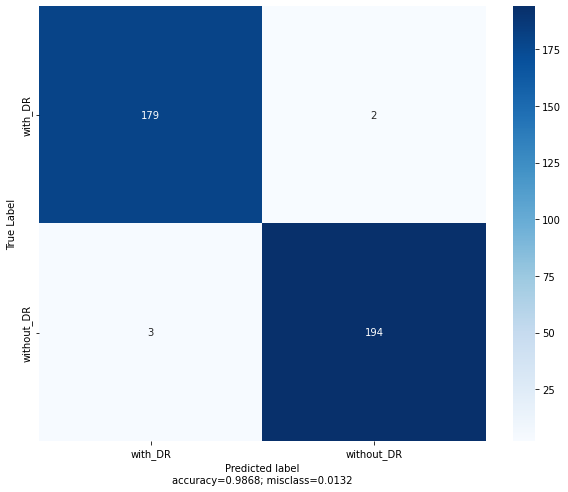

The details for confusion matrix is =
              precision    recall  f1-score   support

     with_DR       0.98      0.99      0.99       181
  without_DR       0.99      0.98      0.99       197

    accuracy                           0.99       378
   macro avg       0.99      0.99      0.99       378
weighted avg       0.99      0.99      0.99       378



In [ ]:
print('CONFUSION MATRIX')
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['with_DR','without_DR'],  
                           index =['with_DR','without_DR']) 

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy
plt.figure(figsize = (10,8)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues") 
plt.ylabel('True Label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show() 

target_names=['with_DR','without_DR']
print('The details for confusion matrix is =') 
print (classification_report(y_true, y_pred,target_names=target_names))

In [ ]:
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity*100 )

Specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', Specificity*100 )

Sensitivity :  98.35164835164835
Specificity :  98.9795918367347


In [ ]:
import pandas as pd

In [ ]:
preds = loaded_model.predict(validation_data)
predictions = [i.argmax() for i in preds]
y_true = [i.argmax() for i in validation_labels]
print(predictions)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
val_df=pd.read_csv('/content/drive/MyDrive/My_projects _and _datasets/Final_work/Binary_prediction - Sheet1.csv')
val_df['ResNet152V2']=predictions
val_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,True Label,vgg16,xception,DenseNet121,ResNet152V2
0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1
2,2,2,2,0,0,0,0,0
3,3,3,3,0,0,0,1,1
4,4,4,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...
651,651,651,651,1,1,1,1,1
652,652,652,652,1,1,1,1,1
653,653,653,653,1,1,1,1,1
654,654,654,654,1,1,1,1,1


In [ ]:
val_df.to_csv('/content/drive/MyDrive/My_projects _and _datasets/Final_work/Binary_prediction - Sheet1.csv')

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/My_projects _and _datasets/Final_work/Binary_confidence_matrix - Sheet1.csv')
preds = loaded_model.predict(test_data)
for i in range(0,2):
  test_df['ResNet152V2_class'+str(i)]=preds[:,i]

In [ ]:
test_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,True Label,vgg16_class0,vgg16_class1,xception_class0,xception_class1,DenseNet121_class0,DenseNet121_class1,ResNet152V2_class0,ResNet152V2_class1
0,0,0,0,0,1.000000,3.271071e-08,9.999988e-01,1.115273e-06,9.820170e-01,1.637366e-02,9.998286e-01,1.799166e-04
1,1,1,1,0,0.650171,3.464978e-01,9.999999e-01,2.007653e-07,9.999959e-01,3.717736e-06,9.999616e-01,4.475310e-05
2,2,2,2,0,0.999786,1.910670e-04,1.000000e+00,7.120615e-14,1.000000e+00,4.247401e-09,1.000000e+00,3.075749e-19
3,3,3,3,0,0.999226,7.497075e-04,9.805162e-01,1.904154e-02,9.609939e-01,4.056132e-02,9.999957e-01,4.397965e-06
4,4,4,4,0,1.000000,9.023950e-08,1.000000e+00,8.365292e-09,1.000000e+00,4.018924e-11,1.000000e+00,3.282192e-10
...,...,...,...,...,...,...,...,...,...,...,...,...
373,373,373,373,1,0.000005,9.999956e-01,8.094603e-12,1.000000e+00,3.967403e-07,9.999998e-01,1.910947e-10,1.000000e+00
374,374,374,374,1,0.000115,9.999150e-01,4.629031e-05,9.999508e-01,1.524401e-05,9.999863e-01,1.259385e-05,9.999866e-01
375,375,375,375,1,0.000070,9.999461e-01,6.023692e-06,9.999930e-01,2.297094e-04,9.998475e-01,3.575140e-05,9.999652e-01
376,376,376,376,1,0.000016,9.999875e-01,7.922729e-09,1.000000e+00,4.790058e-06,9.999969e-01,1.016903e-08,1.000000e+00


In [ ]:
test_df.to_csv('/content/drive/MyDrive/My_projects _and _datasets/Final_work/Binary_confidence_matrix - Sheet1.csv')